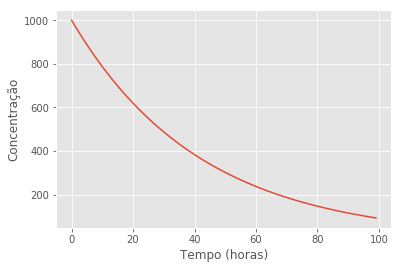

In [44]:
'''
João Zsigmond & André Nadalini

Modelos de concentração de Doxorrubicina no sangue, a partir de um diagrama de estoques e fluxos.

'''

import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.integrate import odeint

style.use('ggplot')

# definindo 1a iteração => valores em horas => Apenas um estoque: Sangue

def primeira_iteração():
    Dose = 1000
    Ke = math.log(2)/30
    tmax = 100
    delta_t = 1
    Concentracao = [Dose]
    l_tempo = np.arange(0, tmax, delta_t)

    for i in range(len(l_tempo)-1):
        # print(i)
        Concentracao.append(Concentracao[i]-Concentracao[i-1]*Ke*delta_t)

    plt.plot(l_tempo, Concentracao)
    plt.xlabel('Tempo (horas)')
    plt.ylabel('Concentração')
    plt.show()

primeira_iteração()



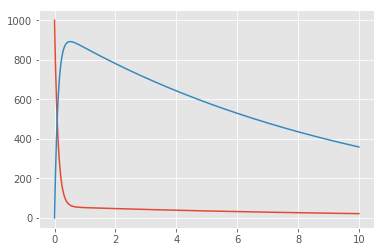

In [40]:
# definindo 2ainteração => valores em dias => Sangue + Tecido (estoques)

def EqDif2(ListaSolucao, t):
   
    kv= 0.5
    kd = math.log(2)/0.0833 #5 minutos em horas
    km= 0.1
    ke= 0.05
    
    S=ListaSolucao[0]
    T=ListaSolucao[1]

    dsdt=T*kv-S*kd-S*ke 
    dTdt=S*kd-T*kv-T*km
    return dsdt, dTdt


def segunda_iteração():
    tmax=10
    delta_t=1e-3
    l_tempo=np.arange(0, tmax, delta_t)
    
    C0=[1000, 0]
    
    
    # for i in range(1, len(l_tempo)-1):
    #     dsdt, dTdt = EqDif2(C0[i-1], C0[i])
    #     # print(dsdt, dTdt)
    #     C0.append(C0[i-1]+dsdt*delta_t)
    #     C0.append(C0[i]+dTdt*delta_t)
    # print(C0)

    Solucao = odeint(EqDif2, C0, l_tempo)
    # print(Solucao)
    plt.plot(l_tempo, Solucao[:, 0])
    plt.plot(l_tempo, Solucao[:, 1])
    plt.show()
    
segunda_iteração()

